In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import yaml

In [28]:
#Add variables from config file
with open('config.yml') as c:
    config = yaml.full_load(c)
possible_choices = config['POSSIBLE_CHOICES']
time_created = config['TIME_CREATED']

In [29]:
# Choose level of position from possible_choices
EXPERIENCE_LEVEL = possible_choices[2]
# By default, time_created is the time of last creation (download) of file to directory data_storage. If you want to work with older data, please uncomment line 4th of code below and write time of creation of file in question in format '%Y_%m_%d_%H_%M_%S'
# time_created = '2023_01_15_23_26'

In [30]:
# Create dataframe
col_names=["Technologies", "Number_of_occurrences"]
folder_path = os.path.abspath("data_storage")
file_name = f"{EXPERIENCE_LEVEL}_{time_created}.csv"
technologies = pd.read_csv(os.path.join(folder_path, file_name), names=col_names, header=None)
technologies.set_index('Technologies', inplace=True)

In [31]:
# Create new row "JavaScript" as sum of "JS" and "JavaScript", which were used for key-word searching
if (technologies.index == "JS").any() and (technologies.index == "JavaScript").any():
    sum_of_js = technologies.loc['JS'] + technologies.loc['JavaScript']
    technologies = technologies.drop(labels=["JS", "JavaScript"], axis=0)
    sum_of_js.name = 'JavaScript'
    technologies = technologies.append([sum_of_js])

C:\Users\alina\AppData\Local\Temp\ipykernel_9204\3582026936.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  technologies = technologies.append([sum_of_js])


In [33]:
# Create new row "Artificial intelligence" as sum of "AI" and "Artificial intelligence", which were used for key-word searching
if (technologies.index == " AI ").any() and (technologies.index == "Artificial intelligence").any():
    sum_of_js = technologies.loc[' AI '] + technologies.loc['Artificial intelligence']
    technologies = technologies.drop(labels=[" AI ", "Artificial intelligence"], axis=0)
    sum_of_js.name = 'Artificial intelligence'
    technologies = technologies.append([sum_of_js])

C:\Users\alina\AppData\Local\Temp\ipykernel_9204\1243958231.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  technologies = technologies.append([sum_of_js])


In [34]:
# Sort dataframe by number of occurrences ot technologies
technologies = technologies.sort_values("Number_of_occurrences", ascending=False)

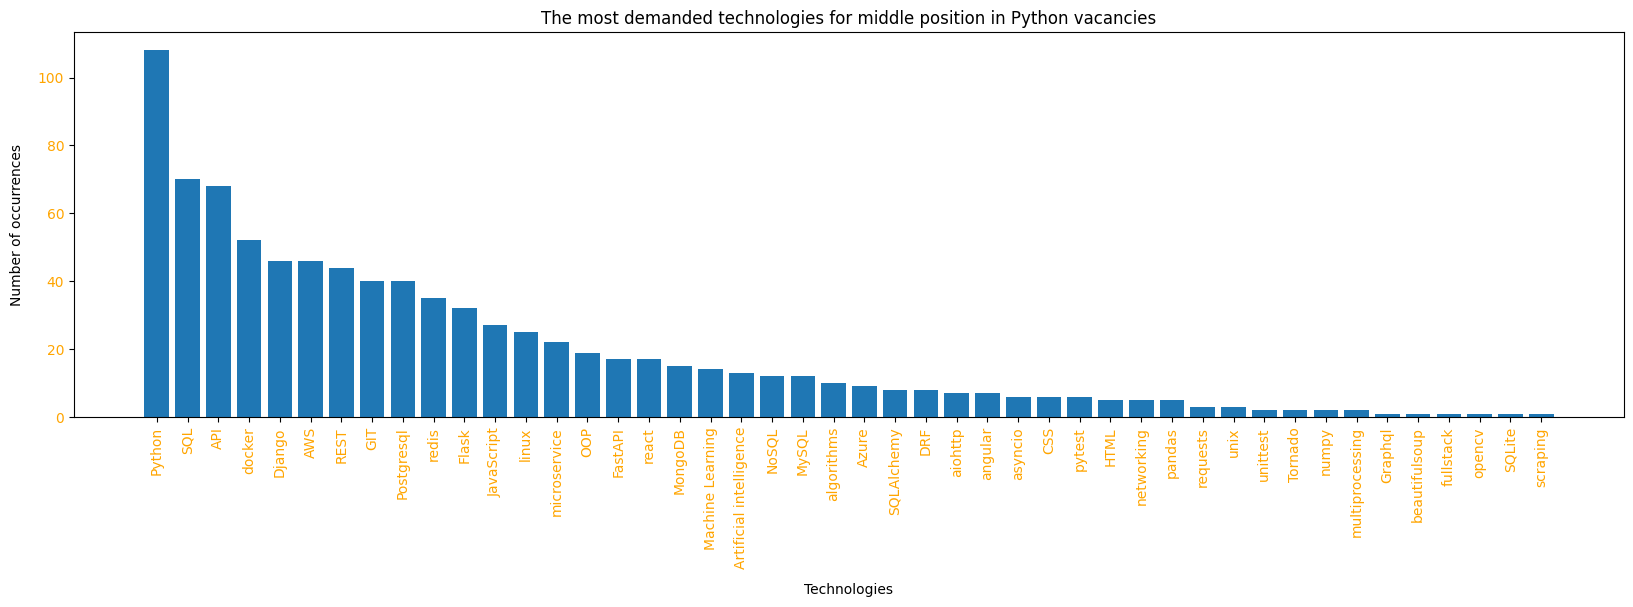

In [35]:
# Choose size of plot
fig = plt.figure(figsize = (20, 5))

# Choose the names of the bars
bars = technologies.index
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, technologies.Number_of_occurrences)

# Create names on the x-axis
plt.xticks(x_pos, bars, color='orange', rotation='vertical')
plt.yticks(color='orange')

# Create names of labels and title
plt.xlabel("Technologies", labelpad=10)
plt.ylabel("Number of occurrences", labelpad=10)
plt.title(f"The most demanded technologies for {EXPERIENCE_LEVEL} position in Python vacancies")

# Save result
# Figures out the absolute path for you in case your working directory moves around.
folder_path = os.path.abspath("plot_results")
plot_name = f'{EXPERIENCE_LEVEL} technologies for {datetime.now().strftime("%Y-%m-%d %H_%M_%S")}.png'
plt.savefig(os.path.join(folder_path, plot_name), bbox_inches="tight")

# Show result
plt.show()